In [19]:
import pandas as pd
import numpy as np
from datascience import *
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.he

,Course Code,Course Title,Course Year,Student Number,Department Code,Course Level,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,IE 316,Engineering Economics,3,713,IE,Undergraduate,A,Successful,2014 - Spring,3,0,3,5
1,MGT 201,Principles of Management,2,713,ITM,Undergraduate,A,Successful,2013 - Fall,3,0,3,5
2,PHYS 104,Physics II-Electromagnetics & Modern phy,1,713,IE,Undergraduate,A,Successful,2012 - Spring,3,0,3,5
3,UNI 123,Textual Analysis and Effective Com.,1,713,IE,Undergraduate,A,Successful,2012 - Spring,3,0,3,5
4,ENGR 244,Engineering Materials,2,713,IE,Undergraduate,A-,Successful,2013 - Spring,3,0,3,5


In [3]:
df.drop([df.columns[0], df.columns[1], df.columns[3], df.columns[7]], inplace=True, axis=1)
df.head()

,Course Year,Department Code,Course Level,Letter Grade,Semester,Theoritical,Practical,Course Credit,ECTS
0,3,IE,Undergraduate,A,2014 - Spring,3,0,3,5
1,2,ITM,Undergraduate,A,2013 - Fall,3,0,3,5
2,1,IE,Undergraduate,A,2012 - Spring,3,0,3,5
3,1,IE,Undergraduate,A,2012 - Spring,3,0,3,5
4,2,IE,Undergraduate,A-,2013 - Spring,3,0,3,5


In [4]:
for row_idx in df.index:
    semester = df.iloc[row_idx, 4].split(' - ')
    df.iloc[row_idx, 4] = semester[1]
df.head()

,Course Year,Department Code,Course Level,Letter Grade,Semester,Theoritical,Practical,Course Credit,ECTS
0,3,IE,Undergraduate,A,Spring,3,0,3,5
1,2,ITM,Undergraduate,A,Fall,3,0,3,5
2,1,IE,Undergraduate,A,Spring,3,0,3,5
3,1,IE,Undergraduate,A,Spring,3,0,3,5
4,2,IE,Undergraduate,A-,Spring,3,0,3,5


In [5]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Semester'], prefix='Semester')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Semester'], axis=1, inplace=True)
df

,Letter Grade,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,A,3,0,3,5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,A,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,A,3,0,3,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,A,3,0,3,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,A-,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,B-,3,0,3,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
49343,B-,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
49344,C,3,0,3,5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
49345,C,3,0,3,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


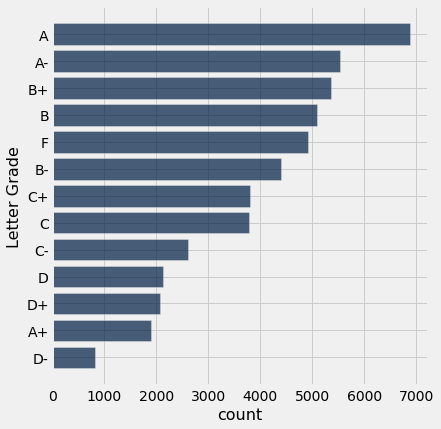

In [8]:
Table().with_column('Letter Grade', df['Letter Grade']).group(0).sort('count', descending=True).barh('Letter Grade')

In [9]:
y = pd.DataFrame(df.pop('Letter Grade'))
y

,Letter Grade
0,A
1,A
2,A
3,A
4,A-
...,...
49342,B-
49343,B-
49344,C
49345,C


In [10]:
columns = df.columns
columns

Index(['Theoritical', 'Practical', 'Course Credit', 'ECTS', 'Course Year_1',
       'Course Year_2', 'Course Year_3', 'Course Year_4', 'Course Year_5',
       'Course Year_6', 'Department Code_BGM/NT', 'Department Code_BGM/T',
       'Department Code_CS', 'Department Code_CTV', 'Department Code_CULT/T',
       'Department Code_DSE/T', 'Department Code_ECE/NT',
       'Department Code_ECE/T', 'Department Code_EE', 'Department Code_HIST',
       'Department Code_HIST PhD', 'Department Code_HIST/T',
       'Department Code_HUK', 'Department Code_IE', 'Department Code_ISE/NT',
       'Department Code_ISE/T', 'Department Code_ISS', 'Department Code_ITM',
       'Department Code_KHUK/NT', 'Department Code_KHUK/T',
       'Department Code_LIT', 'Department Code_MBA/NT', 'Department Code_MGT',
       'Department Code_MTS/T', 'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', 'Department Code_POLS/T',
       'Department Code_PSY', 'Department Code_SOC', 'Departmen

In [11]:
X = df
X.head()

,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,Course Year_6,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,3,0,3,5,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3,0,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,3,0,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,3,0,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,0,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X

,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,Course Year_6,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,-0.645723,2.977822,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
1,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,1.548651,-0.335816,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,1.076587,-1.018304,-0.168983
2,0.119544,-0.267318,-0.193814,-0.271213,1.116338,-0.645723,-0.335816,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
3,0.119544,-0.267318,-0.193814,-0.271213,1.116338,-0.645723,-0.335816,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
4,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,1.548651,-0.335816,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,-0.645723,-0.335816,4.759861,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49343,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,1.548651,-0.335816,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49344,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,-0.645723,2.977822,-0.210090,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49345,0.119544,-0.267318,-0.193814,-0.271213,-0.895786,-0.645723,-0.335816,4.759861,-0.36152,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
